Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of unique labels: 10
Labels: [0 1 2 3 4 5 6 7 8 9]
Label distribution in training data: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


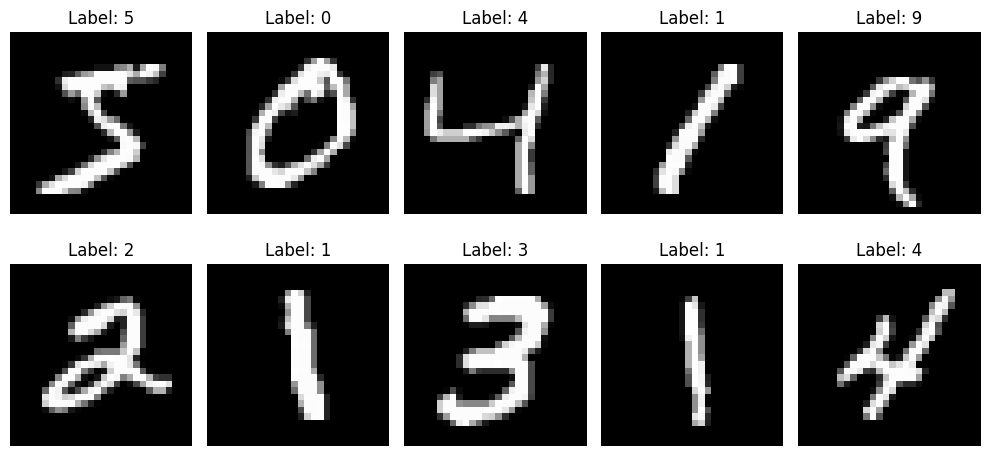

Pixel value range in training data: 0 to 255
Mean pixel value in training data: 33.318421449829934
Standard deviation of pixel values in training data: 78.56748998339798


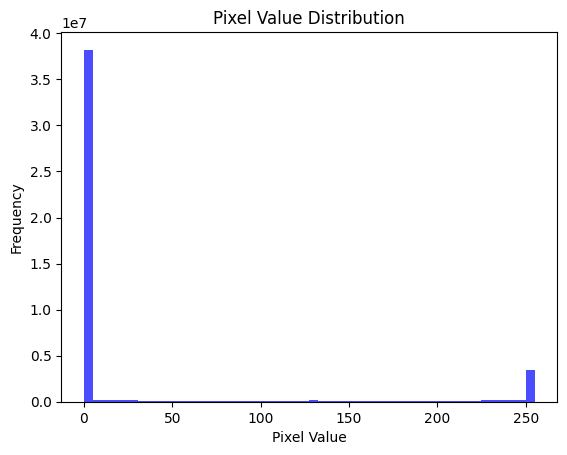

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Analyze the Data
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Number of unique labels:", len(np.unique(y_train)))
print("Labels:", np.unique(y_train))

# Check the distribution of labels in the training set
unique, counts = np.unique(y_train, return_counts=True)
label_distribution = dict(zip(unique, counts))
print("Label distribution in training data:", label_distribution)

# Display some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Compute basic statistics for the pixel values
print("Pixel value range in training data:", X_train.min(), "to", X_train.max())
print("Mean pixel value in training data:", X_train.mean())
print("Standard deviation of pixel values in training data:", X_train.std())

# Visualize pixel value distribution
plt.hist(X_train.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


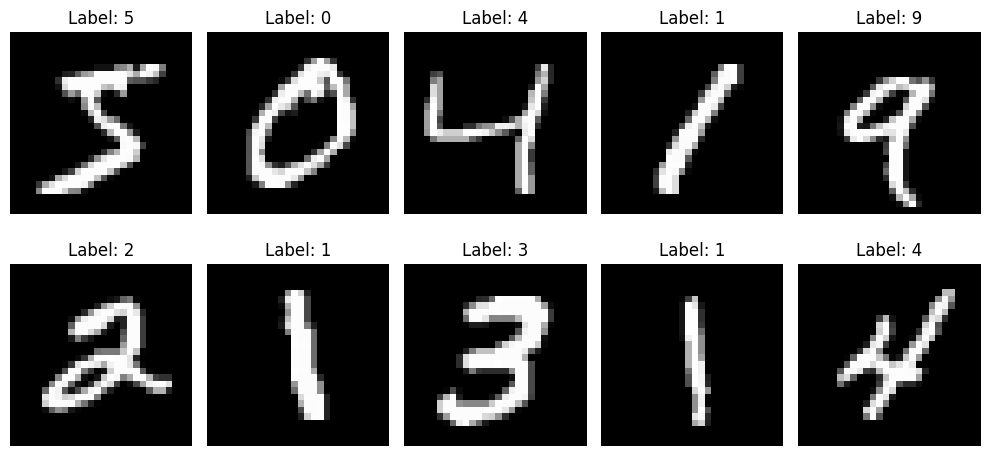


Training model with learning rate: 0.01


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 120ms/step - accuracy: 0.8668 - loss: 0.4185 - val_accuracy: 0.9864 - val_loss: 0.0463
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 106ms/step - accuracy: 0.9712 - loss: 0.0959 - val_accuracy: 0.9853 - val_loss: 0.0467
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9753 - loss: 0.0846 - val_accuracy: 0.9868 - val_loss: 0.0466
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9800 - loss: 0.0668 - val_accuracy: 0.9879 - val_loss: 0.0413
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9784 - loss: 0.0756 - val_accuracy: 0.9874 - val_loss: 0.0395

Training model with learning rate: 0.001
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 105ms/step - accuracy: 0.7966 - loss: 0.6455 - val_accuracy: 0.9813 - val_loss: 0.0635
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.9688 - loss: 0.1070 - val_accuracy: 0.9878 - val_loss: 0.0378
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms

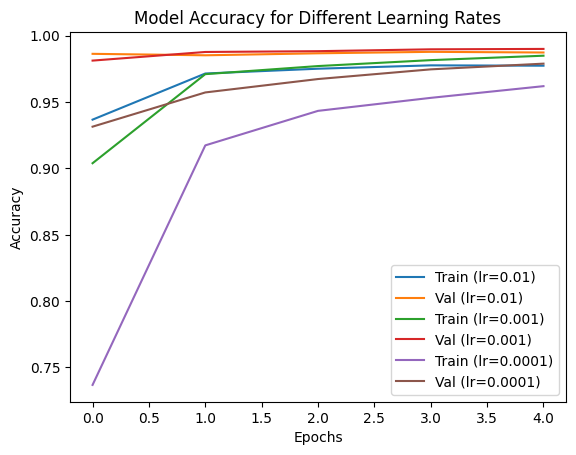


Final Test Accuracy for Each Learning Rate:
Learning Rate: 0.01, Test Accuracy: 0.9874
Learning Rate: 0.001, Test Accuracy: 0.9901
Learning Rate: 0.0001, Test Accuracy: 0.9790


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and Analyze the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 2: Preprocess the Data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encoding of labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 3: Define the Model
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Step 4: Train and Evaluate the Model for Different Learning Rates
learning_rates = [0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    print(f"\nTraining model with learning rate: {lr}")
    model = create_model()
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), verbose=1)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[lr] = test_accuracy

    # Plot training history
    plt.plot(history.history['accuracy'], label=f'Train (lr={lr})')
    plt.plot(history.history['val_accuracy'], label=f'Val (lr={lr})')

# Step 5: Analyze Results
plt.title('Model Accuracy for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("\nFinal Test Accuracy for Each Learning Rate:")
for lr, acc in results.items():
    print(f"Learning Rate: {lr}, Test Accuracy: {acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


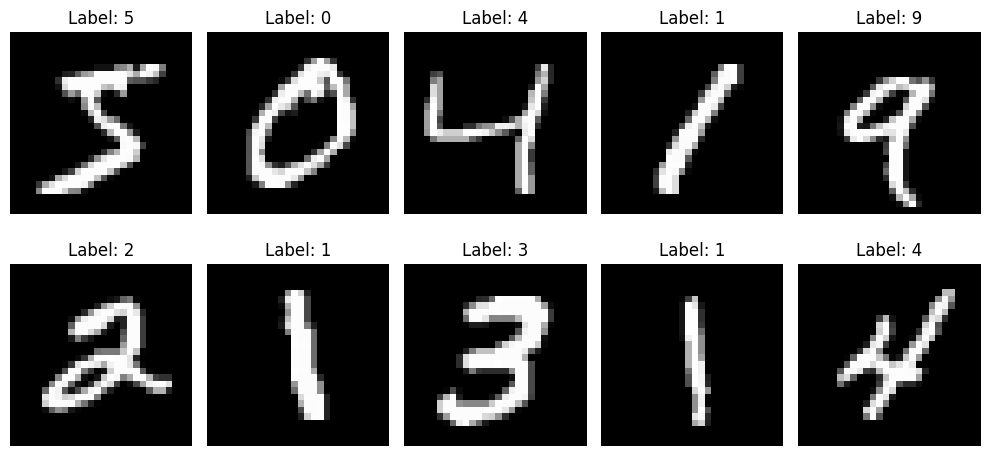


Training model with learning rate: 0.01


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8726 - loss: 0.3971 - val_accuracy: 0.9615 - val_loss: 0.1239
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9608 - loss: 0.1272 - val_accuracy: 0.9619 - val_loss: 0.1262
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9716 - loss: 0.0951 - val_accuracy: 0.9672 - val_loss: 0.1131
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9760 - loss: 0.0800 - val_accuracy: 0.9716 - val_loss: 0.1010
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9790 - loss: 0.0702 - val_accuracy: 0.9686 - val_loss: 0.1331

Training model with learning rate: 0.001
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8315 - loss: 0.6219 - val_accuracy: 0.9548 - val_loss: 0.1556
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9568 - loss: 0.1501 - val_accuracy: 0.9656 - val_loss: 0.1146
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9707

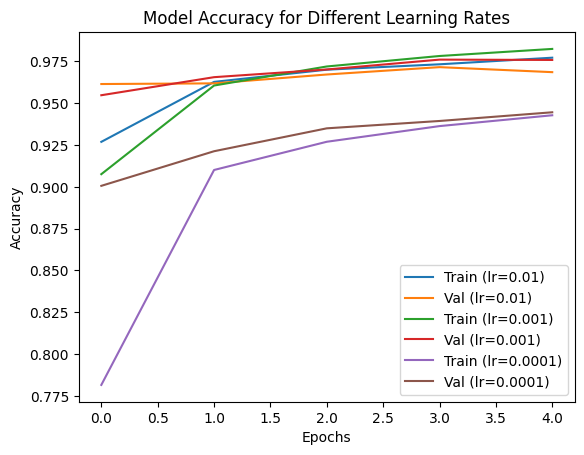

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and Analyze the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 2: Preprocess the Data
X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# One-hot encoding of labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 3: Define the Model
def create_dense_model():
    model = Sequential([
        Flatten(input_shape=(28 * 28,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Step 4: Train and Evaluate the Model for Different Learning Rates
learning_rates = [0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    print(f"\nTraining model with learning rate: {lr}")
    model = create_dense_model()
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), verbose=1)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[lr] = test_accuracy

    # Plot training history
    plt.plot(history.history['accuracy'], label=f'Train (lr={lr})')
    plt.plot(history.history['val_accuracy'], label=f'Val (lr={lr})')

# Step 5: Analyze Results
plt.title('Model Accuracy for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("\nFinal Test Accuracy for Each Learning Rate:")
for lr, acc in results.items():
    print(f"Learning Rate: {lr}, Test Accuracy: {acc:.4f}")


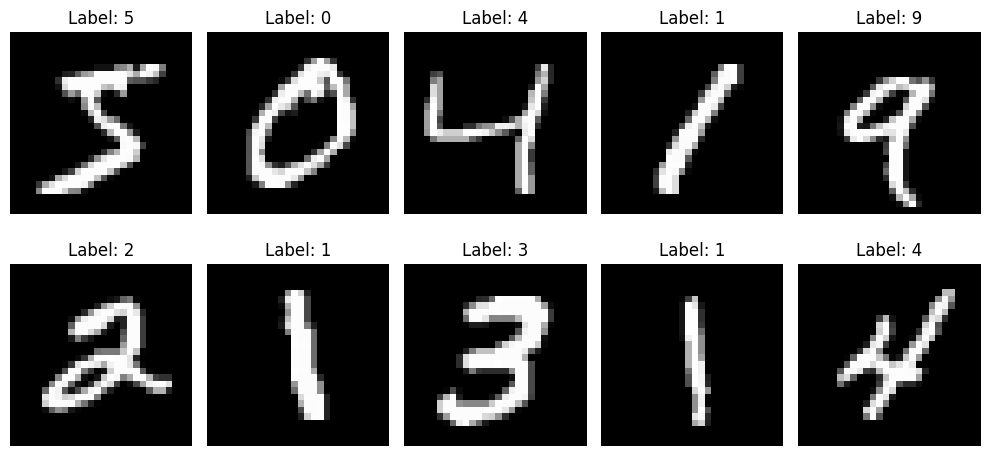


Training model with learning rate: 0.01
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8672 - loss: 0.4292 - val_accuracy: 0.9556 - val_loss: 0.1495
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9464 - loss: 0.1836 - val_accuracy: 0.9632 - val_loss: 0.1225
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9559 - loss: 0.1473 - val_accuracy: 0.9671 - val_loss: 0.1112
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9617 - loss: 0.1259 - val_accuracy: 0.9704 - val_loss: 0.0936
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9628 - loss: 0.1217 - val_accuracy: 0.9692 - val_loss: 0.0977
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9666 - loss: 0.1089 - val_accuracy: 0.9724 - val_loss: 0.0925
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9690 - loss: 0.1032 - val_accuracy: 0.9725 - val_loss: 0.0920
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - 

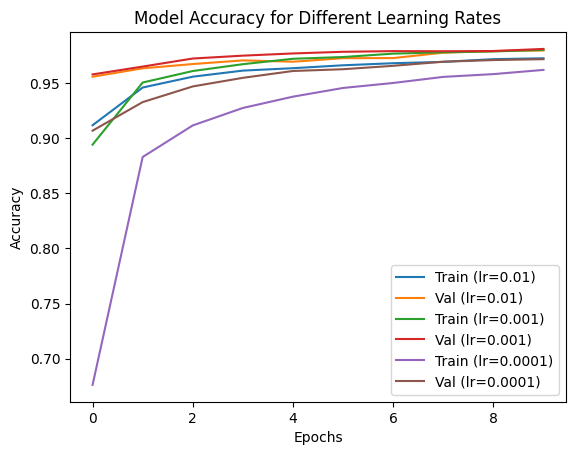


Final Test Accuracy for Each Learning Rate:
Learning Rate: 0.01, Test Accuracy: 0.9794
Learning Rate: 0.001, Test Accuracy: 0.9808
Learning Rate: 0.0001, Test Accuracy: 0.9715


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and Analyze the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 2: Preprocess the Data
X_train = X_train.reshape(-1, 28 * 28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# One-hot encoding of labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 3: Define the Model with Batch Normalization and Dropout
def create_dense_model():
    model = Sequential([
        Flatten(input_shape=(28 * 28,)),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Step 4: Train and Evaluate the Model for Different Learning Rates
learning_rates = [0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    print(f"\nTraining model with learning rate: {lr}")
    model = create_dense_model()
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=1)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[lr] = test_accuracy

    # Plot training history
    plt.plot(history.history['accuracy'], label=f'Train (lr={lr})')
    plt.plot(history.history['val_accuracy'], label=f'Val (lr={lr})')

# Step 5: Analyze Results
plt.title('Model Accuracy for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("\nFinal Test Accuracy for Each Learning Rate:")
for lr, acc in results.items():
    print(f"Learning Rate: {lr}, Test Accuracy: {acc:.4f}")
